  gender  engagement
0   Male      5.2875
1   Male      5.4450
2   Male      5.1900
3   Male      5.6100
4   Male      5.6500


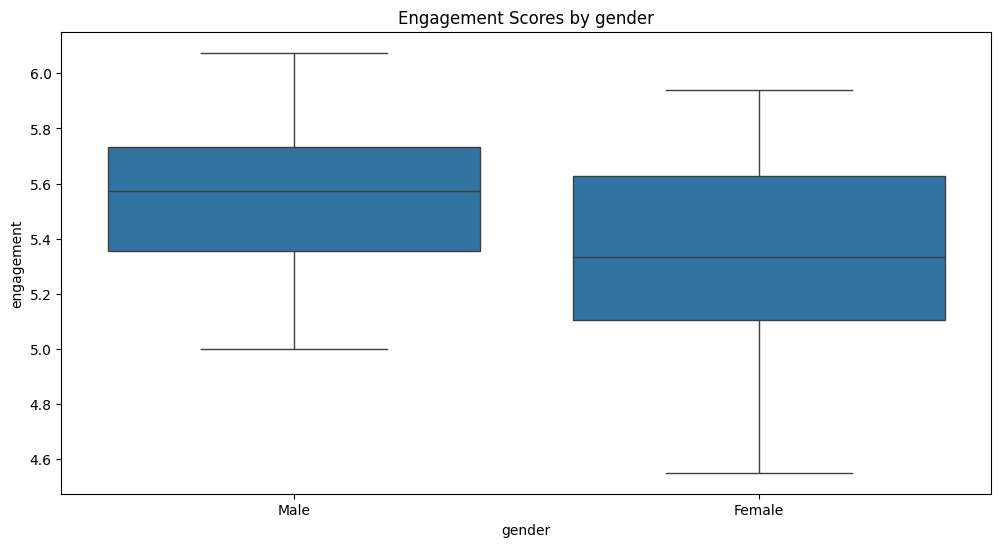

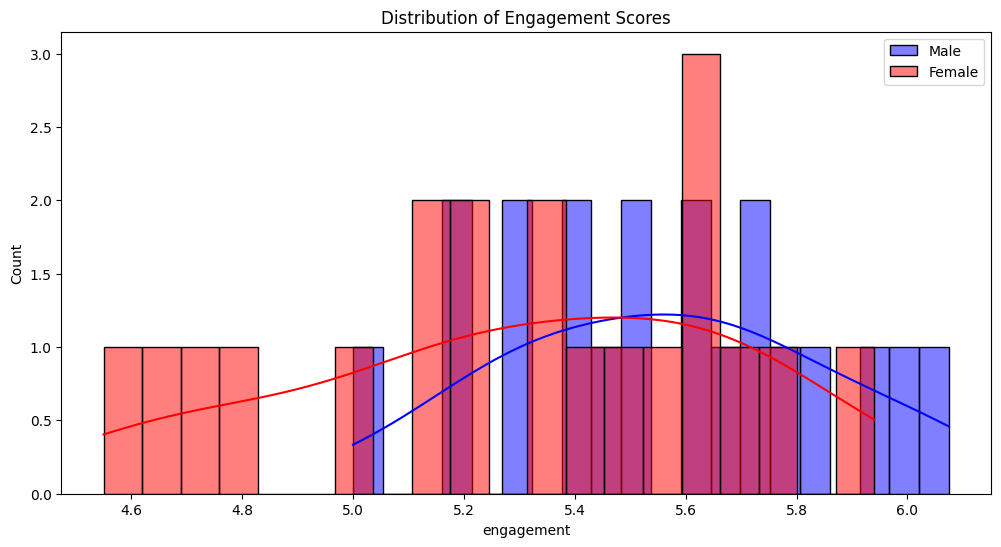

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('advertising_agency_engagement.csv')

# Display the first few rows of the dataframe
print(data.head())

# Separate the data into two groups
male_scores = data[data['gender'] == 'Male']['engagement'] #Important
Female_scores = data[data['gender'] == 'Female']['engagement']

# Plot boxplots to visualize the data and check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='engagement', data=data)
plt.title('Engagement Scores by gender')
plt.show()

# Plot histograms to visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(male_scores, kde=True, label='Male', color='blue', bins=20)
sns.histplot(Female_scores, kde=True, label='Female', color='red', bins=20)
plt.title('Distribution of Engagement Scores')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import shapiro
import scipy.stats as stats

# Shapiro-Wilk test for normality
shapiro_male = shapiro(male_scores)
shapiro_Female = shapiro(Female_scores)
print('Shapiro-Wilk Test', shapiro_male)


print(f"Shapiro-Wilk Test for male: W={shapiro_male[0]}, p-value={shapiro_male[1]}")
print(f"Shapiro-Wilk Test for Female: W={shapiro_Female[0]}, p-value={shapiro_Female[1]}")

# Q-Q plots

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(male_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot for Male')

plt.subplot(1, 2, 2)
stats.probplot(Female_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot for Female')

plt.show()


: 

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# Choose the appropriate statistical test and conduct it
if shapiro_male[1] > 0.05 and shapiro_Female[1] > 0.05:
    # Both distributions are normal
    stat, p_value = ttest_ind(male_scores, Female_scores)
    test_name = 'Independent t-test'
else:
    # At least one distribution is not normal
    stat, p_value = mannwhitneyu(male_scores, Female_scores)
    test_name = 'Mann-Whitney U test'

print(f"{test_name}: Statistic={stat}, p-value={p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in engagement between elderly Male and Female.")
else:
    print("There is no significant difference in engagement between elderly Male and Female.")


: 

  gender  engagement
0   Male      5.2875
1   Male      5.4450
2   Male      5.1900
3   Male      5.6100
4   Male      5.6500


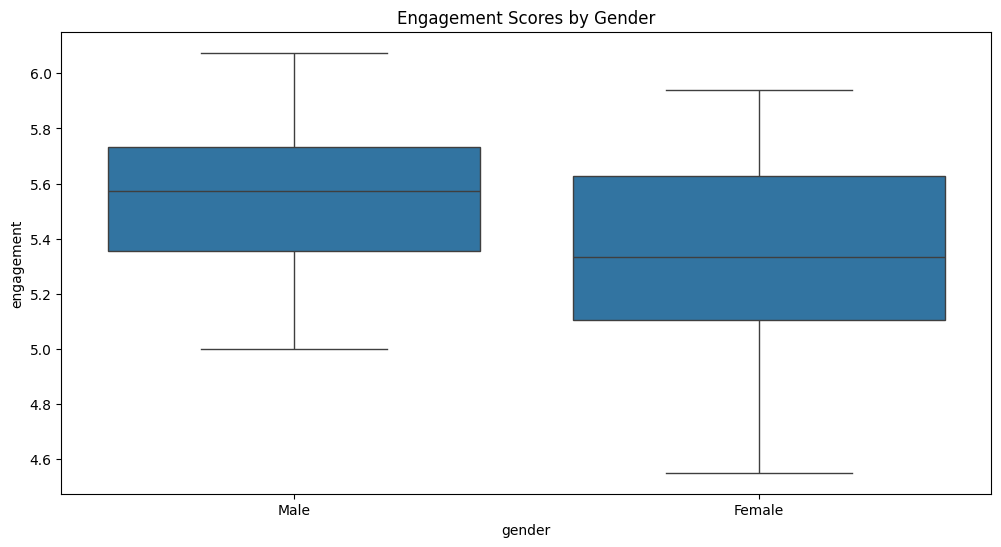

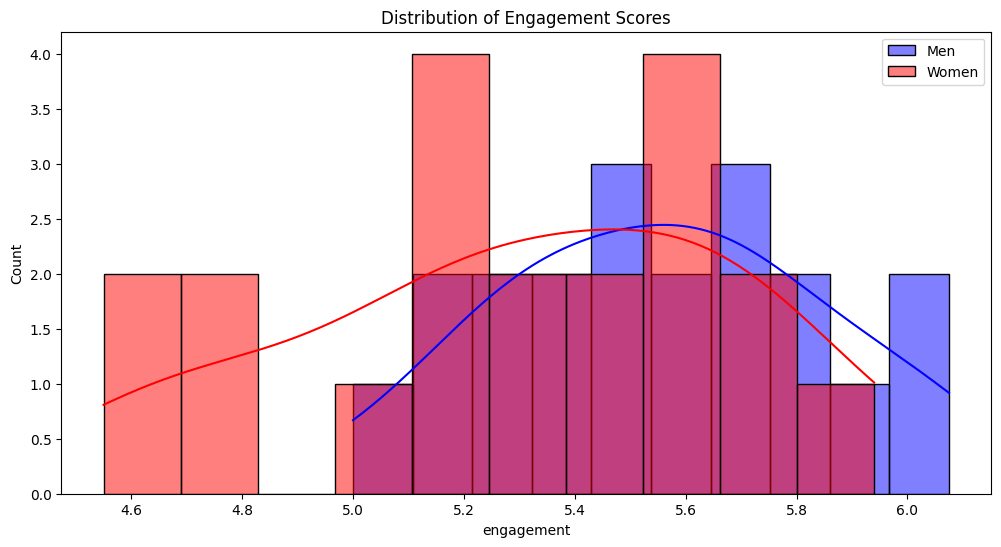

Shapiro-Wilk Test for Men: W=0.9834404587745667, p-value=0.9704522490501404
Shapiro-Wilk Test for Women: W=0.9607778191566467, p-value=0.559502899646759
Independent t-test: Statistic=2.364514121330194, p-value=0.023265128430677132
There is a significant difference in engagement between elderly men and women.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import scipy.stats as stats

# Load the data
data = pd.read_csv('advertising_agency_engagement.csv')

# Display the first few rows of the dataframe
print(data.head())

# Separate the data into two groups
men_scores = data[data['gender'] == 'Male']['engagement']
women_scores = data[data['gender'] == 'Female']['engagement']

# Plot boxplots to visualize the data and check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='engagement', data=data)
plt.title('Engagement Scores by Gender')
plt.show()

# Plot histograms to visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(men_scores, kde=True, label='Men', color='blue', bins=10)
sns.histplot(women_scores, kde=True, label='Women', color='red', bins=10)
plt.title('Distribution of Engagement Scores')
plt.legend()
plt.show()

# Shapiro-Wilk test for normality
shapiro_men = shapiro(men_scores)
shapiro_women = shapiro(women_scores)

print(f"Shapiro-Wilk Test for Men: W={shapiro_men[0]}, p-value={shapiro_men[1]}")
print(f"Shapiro-Wilk Test for Women: W={shapiro_women[0]}, p-value={shapiro_women[1]}")

# Choose the appropriate statistical test and conduct it
if shapiro_men[1] > 0.05 and shapiro_women[1] > 0.05:
    # Both distributions are normal
    stat, p_value = ttest_ind(men_scores, women_scores)
    test_name = 'Independent t-test'
else:
    # At least one distribution is not normal
    stat, p_value = mannwhitneyu(men_scores, women_scores)
    test_name = 'Mann-Whitney U test'

print(f"{test_name}: Statistic={stat}, p-value={p_value}")

# Conclusion
if p_value < 0.05:
    conclusion = "There is a significant difference in engagement between elderly men and women."
else:
    conclusion = "There is no significant difference in engagement between elderly men and women."

print(conclusion)


# Conclusion about the Hypothesis

## Hypothesis
- **Null Hypothesis ($( H_0 )$)**: There is no significant difference in engagement between elderly men and women.
- **Alternative Hypothesis ($( H_1 )$)**: Elderly men and women engage differently with the robot.

## Statistical Test Results
- **Test Used**: Independent t-test
- **Test Statistic**: 2.3645
- **p-value**: 0.0233

## Interpretation
The p-value from the Independent t-test is 0.0233. In hypothesis testing, we compare the p-value with a significance level ($(\alpha)$), typically set at 0.05.

- **p-value $<$ 0.05**: This means we reject the null hypothesis ($( H_0 )$).
- **p-value $\geq$ 0.05**: This means we fail to reject the null hypothesis.

In this case, since the p-value (0.0233) is less than the significance level (0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in engagement scores between elderly men and women.

## Explanation of the Conclusion
1. **Statistical Significance**:
   - The low p-value (0.0233) indicates that the observed difference in engagement scores between men and women is unlikely to have occurred by random chance alone. Therefore, we conclude that there is a real difference in how elderly men and women engage with the robot.

2. **Practical Implications**:
   - **Product Development**: The company should consider that elderly men and women interact with the robot differently. Features, user interfaces, and functionalities might need to be tailored to better meet the needs and preferences of each gender.
   - **Marketing Strategies**: Marketing efforts could be designed to address the specific aspects of the robot that appeal to each gender group, thereby enhancing user satisfaction and engagement.

3. **Further Research**:
   - It would be beneficial to conduct further studies to understand why men and women engage differently with the robot. Qualitative research, such as interviews or focus groups, could provide deeper insights into the preferences and expectations of each group.
   - The company could also explore other demographic factors, such as age, socioeconomic status, or cultural background, to see if they influence engagement in a similar way.

## Summary
The Independent t-test results indicate a significant difference in engagement between elderly men and women (p-value = 0.0233). This finding suggests that gender plays a role in how elderly individuals interact with the robot. Understanding and addressing these differences can help the company improve the robot's design and user experience, ultimately leading to better outcomes for the target demographic.
